<a href="https://colab.research.google.com/github/Christina-26/Marvel-tasks-level-2/blob/main/Task_9_Decision_Tress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision tree**:

A decision tree is a type of supervised learning algorithm that is commonly used in machine learning to model and predict outcomes based on input data. It is a tree-like structure where each internal nodetests on  attribute, each branch corresponds to attribute value and each leaf node represents the final decision or prediction.

Decision tree algorithm is used to solve classification problem in machine learning domain.

In [310]:
import pandas as pd

In [311]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [312]:
#Target variable
inputs = df.drop('salary_more_then_100k',axis='columns')

In [313]:
target = df['salary_more_then_100k']

In [314]:
from sklearn.preprocessing import LabelEncoder
# creating objects of this class

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [315]:
#creating 3 mpre columns in input data frame
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [316]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [317]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [318]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [319]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [320]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

**How does a decision tree look like:**

At the beginning, we consider the whole training set as the root.

Feature values are preferred to be categorical.

On the basis of attribute values, records are distributed recursively.

We use statistical methods for ordering attributes as root or the internal node.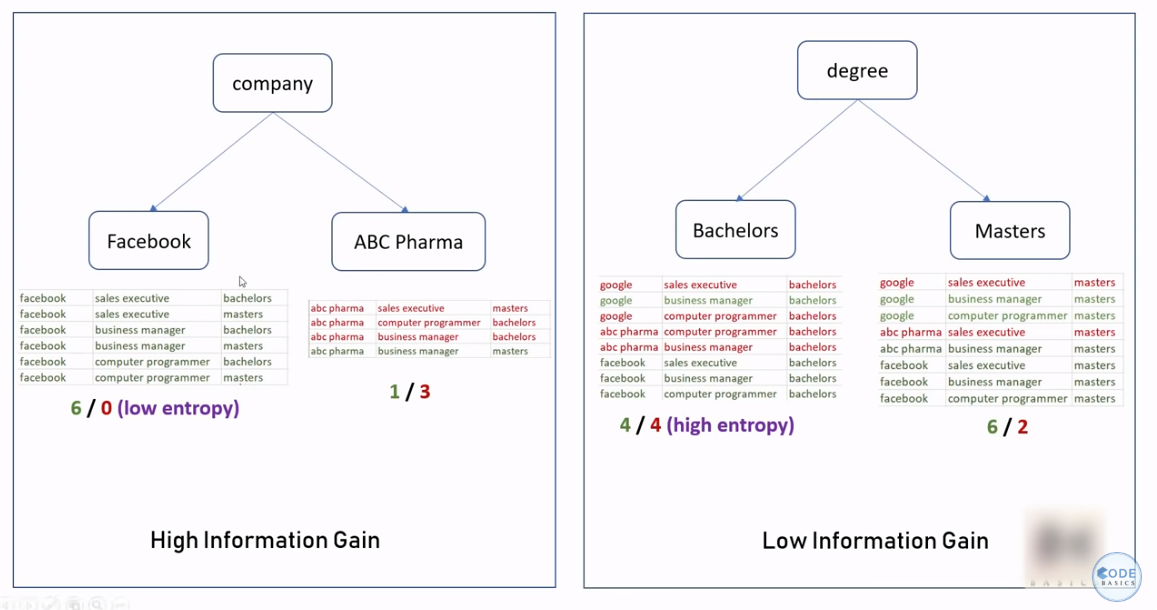

In [321]:
model.fit(inputs_n.values, target.values)

DecisionTreeClassifier()

In [322]:
model.score(inputs_n.values,target.values)

1.0

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [323]:
model.predict([[2,1,0]])

array([0])

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [324]:
model.predict([[2,1,1]])

array([1])

***Build decision tree model to predict survival based on certain parameters using the given csv file.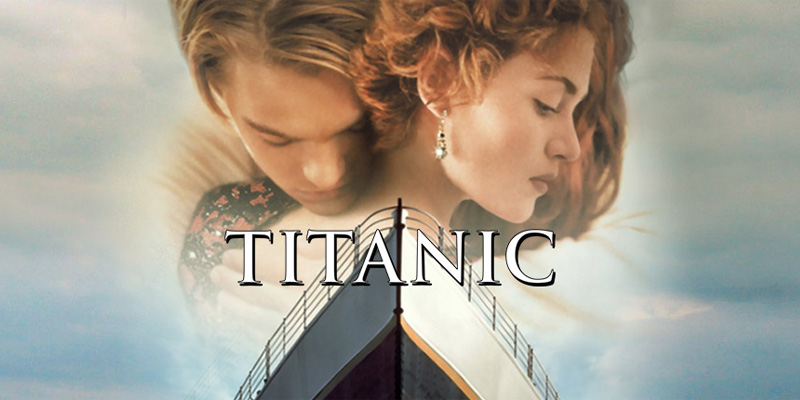***

In [325]:
import pandas as pd

In [326]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [328]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [329]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived


In [330]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [331]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [332]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [333]:
from sklearn.model_selection import train_test_split

In [334]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [335]:
len(X_train)

712

In [336]:
len(X_test)

179

In [337]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [338]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [339]:
model.score(X_test,y_test)

0.8156424581005587